In [5]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

In [6]:
#importing file in csv format
data =pd.read_csv("C:/Users/Lenovo/Desktop/Data-Science-ML-Capstone-Projects-master/avocado.csv",index_col=0)
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [7]:
#number of coloumns and rows
data.shape

(16468, 13)

In [8]:
#what is types of attributes
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [9]:
#finding the correlation
data.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


In [10]:
#null values
data.isnull().sum(axis=0)

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [11]:
#length of data
len(data)

16468

In [12]:
#finding mean,std,min,max
data.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16468 entries, 0.0 to nan
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.8+ MB


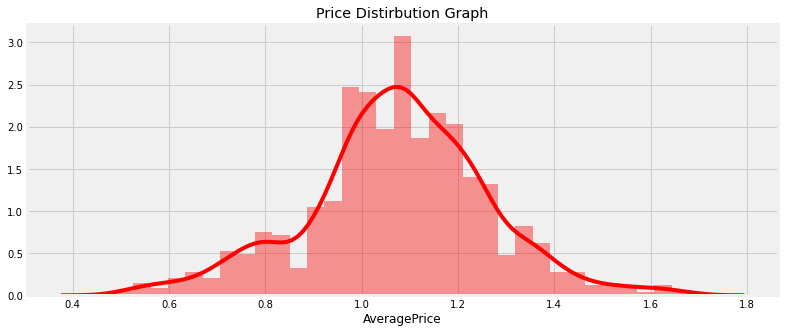

In [14]:
#visualization
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(data["AveragePrice"], color = 'r')


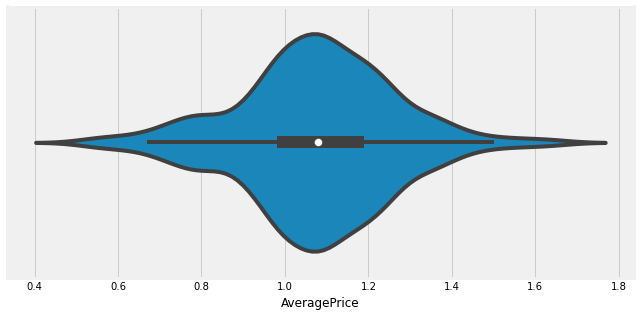

In [15]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(data.dropna(subset = ['AveragePrice']).AveragePrice)

conventional    1517
Name: type, dtype: int64


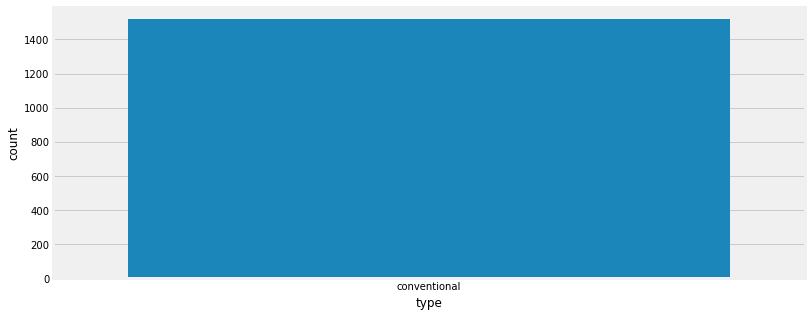

In [16]:
print(data['type'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(data['type'])
plt.show()

In [24]:
conda install libpython m2w64-toolchain -c msys2


Note: you may need to restart the kernel to use updated packages.



CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/noarch/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/noarch'




In [25]:
pip install fbprophet

In [26]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
import numpy as np
dates = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 1),index=dates, columns=['Average price'])


In [28]:
df = df.rename(columns={'date': 'ds','AveragePrice': 'y'})

In [30]:
data.groupby('type').groups

{'conventional': Float64Index([ 0.0,  1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0,
               ...
                5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0, 13.0, 14.0],
              dtype='float64', length=1517)}

In [31]:
PREDICTION_TYPE = 'conventional'
data= data[data.type == PREDICTION_TYPE]

In [32]:
data['Date'] = pd.to_datetime(data['Date'])

In [33]:
regions = data.groupby(data.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Total regions : 51
-------------
Albany  :  67
Atlanta  :  54
BaltimoreWashington  :  65
Boise  :  65
Boston  :  62
BuffaloRochester  :  51
California  :  76
Charlotte  :  31
Chicago  :  23
Columbus  :  47
DallasFtWorth  :  17
Denver  :  24
Detroit  :  40
GrandRapids  :  23
GreatLakes  :  18
HarrisburgScranton  :  19
HartfordSpringfield  :  13
Houston  :  29
Indianapolis  :  16
Jacksonville  :  41
LasVegas  :  10
LosAngeles  :  3
Louisville  :  34
MiamiFtLauderdale  :  17
Midsouth  :  18
Nashville  :  25
NewYork  :  44
Northeast  :  12
NorthernNewEngland  :  29
Orlando  :  21
Philadelphia  :  13
PhoenixTucson  :  52
Pittsburgh  :  22
Plains  :  12
Portland  :  30
RaleighGreensboro  :  16
RichmondNorfolk  :  21
Roanoke  :  17
SanDiego  :  38
SanFrancisco  :  15
Seattle  :  9
SouthCarolina  :  24
SouthCentral  :  39
Southeast  :  9
Spokane  :  49
StLouis  :  16
Syracuse  :  19
Tampa  :  34
TotalUS  :  25
West  :  36
WestTexNewMexico  :  27


In [34]:
PREDICTING_FOR = "TotalUS"

In [35]:
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

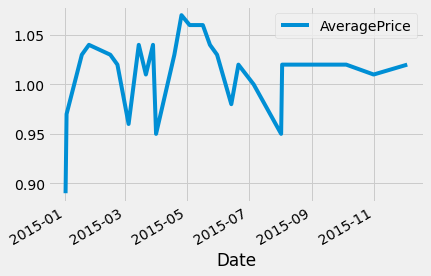

In [36]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

In [37]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [38]:
m = Prophet()
m.fit(date_price)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


In [39]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

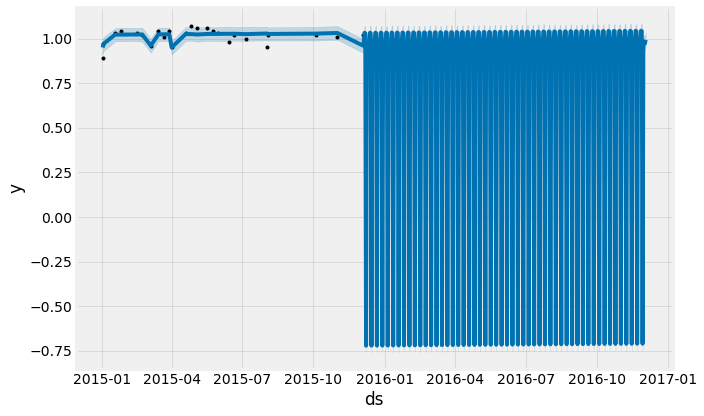

In [40]:
graph1 = m.plot(forecast)

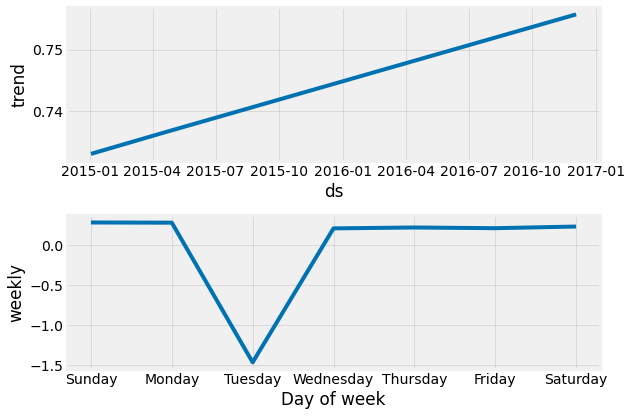

In [41]:
#that rising prices would go down in the coming years.
graph2 = m.plot_components(forecast)

In [45]:
import joblib
import sklearn
svc = sklearn.svm.SVC()

In [46]:
joblib.dump(svc, 'avocado.pkl')

['avocado.pkl']